# **Homework 2 - Videogames Reviews**

*Group#12*

- **Marco Zimmatore** - [zimmatore.1947442@studenti.uniroma1.it](zimmatore.1947442@studenti.uniroma1.it)
- **Camilla Labbate** - [camillalabbate02@icloud.com](camillalabbate02@icloud.com)
- **Francesco De Martino** - [Demartino.1908303@studenti.uniroma1.it](Demartino.1908303@studenti.uniroma1.it)
- **Alessandro Querqui** - [querqui.2031384@studenti.uniroma1.it](querqui.2031384@studenti.uniroma1.it)

### **Libraries**

In [1]:
#Import The Libraries to manage and plot data
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import functions
import numpy as np
import seaborn as sns
import importlib

%%capture
# Set to True the first time you run this file to install the required packages
install_packages = False
if install_packages:
    %pip install -r requirements.txt
import os

if not os.path.exists('ADM-HW2'):
    os.makedirs('ADM-HW2')

if not all(os.path.exists(folder) for folder in ['ADM-HW2/steam_reviews.csv']):
    !gdown 1ELFPkOeFlwHth8zq5-54xXytZKy0xs-c
    !unzip -o data_steam_reviews.zip
    !rm data_steam_reviews.zip
    !mv steam_reviews.csv data/steam_reviews.csv


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [51]:
#To avoid to restart the kernel whenever we change a function 

importlib.reload(functions)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<module 'functions' from 'c:\\Users\\Marco\\Desktop\\Data Science Magistrale\\ADM\\ADM-HW2\\ADM-HW2\\functions.py'>

### **[RQ1] - Exploratory Data Analysis (EDA)**

 EDA is a fundamental step to gain a clear view of the data, identify any anomalies, trends, correlations, and structure the dataset for further analysis.

Fitst of all, we load the csv file into a DataFrame 

In [41]:
df = pd.read_csv("../steam_reviews.csv", header="infer", index_col = 0)

Then drop the duplicates mantaining the same values of the dataset's keys ['app_id','review_id']


In [45]:
df = df.drop_duplicates(subset=['app_id', 'review_id'])


#### **1. Exploring the Dataset**

Before doing further analysis, we want to understand the data. To do that, we can inspect the first rows of the dataset, check the dataset dimensions, identify the data types of each columns or count missing values.

In [43]:
#Print the first Three Rows of the DataFrame
df.head(3)


,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09


In [ ]:
functions.explore(df)

List of Columns of the DataFrame: Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object') 

Shape of the DataFrame: (21612444, 22) 

Data Types of the columns:
 app_id                              int64
app_name                           object
review_id                           int64
language                           object
review                             object
timestamp_created                   int64
timestamp_updated                   int64
recommended                          bool
votes_helpful                       int64
votes_funny

#### **2. Tabular Summary**

The second step of EDA is to calculate statistics like mean, median, minimum through the Pandas function **describe()** and explore how data is ditributed ( for example, check if there are outliers...).

In [ ]:
df.describe()

,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07,2.174737e+07
mean,3.928181e+05,5.187500e+07,1.544432e+09,1.547556e+09,4.044689e+05,1.267917e+05,1.654424e-01,1.308768e-01,7.656120e+16,1.011300e+06,4.044775e+05,1.609105e+04,1.555421e+02,8.807421e+03,1.580505e+09
std,2.480977e+05,2.084267e+07,5.812194e+07,5.689899e+07,1.333741e+09,2.333553e+07,2.434006e-01,2.199398e+00,3.179134e+08,2.108829e+09,1.333741e+09,3.743057e+04,7.300488e+02,2.388553e+04,4.676178e+07
min,7.000000e+01,4.300000e+01,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.427600e+05,3.639355e+07,1.510223e+09,1.511729e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02,1.573329e+09
50%,3.595500e+05,5.384058e+07,1.562446e+09,1.572189e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03,1.599058e+09
75%,5.780800e+05,6.928793e+07,1.589696e+09,1.591403e+09,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03,1.609002e+09
max,1.291340e+06,8.521867e+07,1.611426e+09,2.283383e+09,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,1.611434e+09


In [ ]:
#Numbers of Outliers of Steam Comment Count per App

functions.ouliers(df)

Number of outliers in number of comments per app: 977777


#### Others Interesting Checks

In [ ]:
#List of Apps reviewed

df['app_name'].unique()

array(['The Witcher 3: Wild Hunt', 'Half-Life', 'Counter-Strike: Source',
       'Half-Life 2: Episode Two', 'Portal 2', 'X Rebirth', "Garry's Mod",
       "Sid Meier's Civilization V", 'Dead by Daylight',
       "Sid Meier's Civilization VI", 'Subnautica', 'Human: Fall Flat',
       'Beat Saber', 'Cold Waters', 'Banished', 'Celeste',
       'Getting Over It with Bennett Foddy', 'A Hat in Time',
       'Overcooked! 2', 'Slipstream', 'The Forest',
       'Pogostuck: Rage With Your Friends', 'PC Building Simulator',
       'RollerCoaster Tycoon World', 'NBA 2K18', 'NBA 2K21',
       'Deus Ex: The Fall', 'Rapture Rejects', 'Artifact',
       'Call of Duty: Infinite Warfare', 'Cube World', 'NBA 2K19',
       'Nether', 'Wolfenstein: Youngblood',
       'Warhammer 40,000: Dawn of War III', 'Takedown: Red Sabre',
       'ATLAS', 'Stay Out', 'Identity', 'Umbrella Corps',
       'Hunt Down The Freeman', 'WWE 2K20', 'Down To One', 'Axiom Verge',
       'Guacamelee! Super Turbo Championship Editi

In [38]:
# Other Stats
functions.stats(df)

Total reviews: 12406560

Unique apps: 315

Average helpful votes: 354495.04259657796

Top 5 apps with the most reviews:  app_name
PLAYERUNKNOWN'S BATTLEGROUNDS     1240746
Grand Theft Auto V                 616523
Tom Clancy's Rainbow Six Siege     503321
Terraria                           391942
Among Us                           379942
Name: count, dtype: int64

Top 5 authors with the most reviews: author.steamid
76561198410798793    1
76561198068195098    1
76561198443150093    1
76561197975248603    1
76561198206384423    1
Name: count, dtype: int64

Average playtime forever: 17862.09199682942
Top 5 Languages most used for reviews: language
english      5168482
schinese     2387722
russian      1359161
spanish       471523
brazilian     470343
Name: count, dtype: int64



#### **3. Visualize**

Lastly, we want to plot the dataset to understand the correlations between columns.

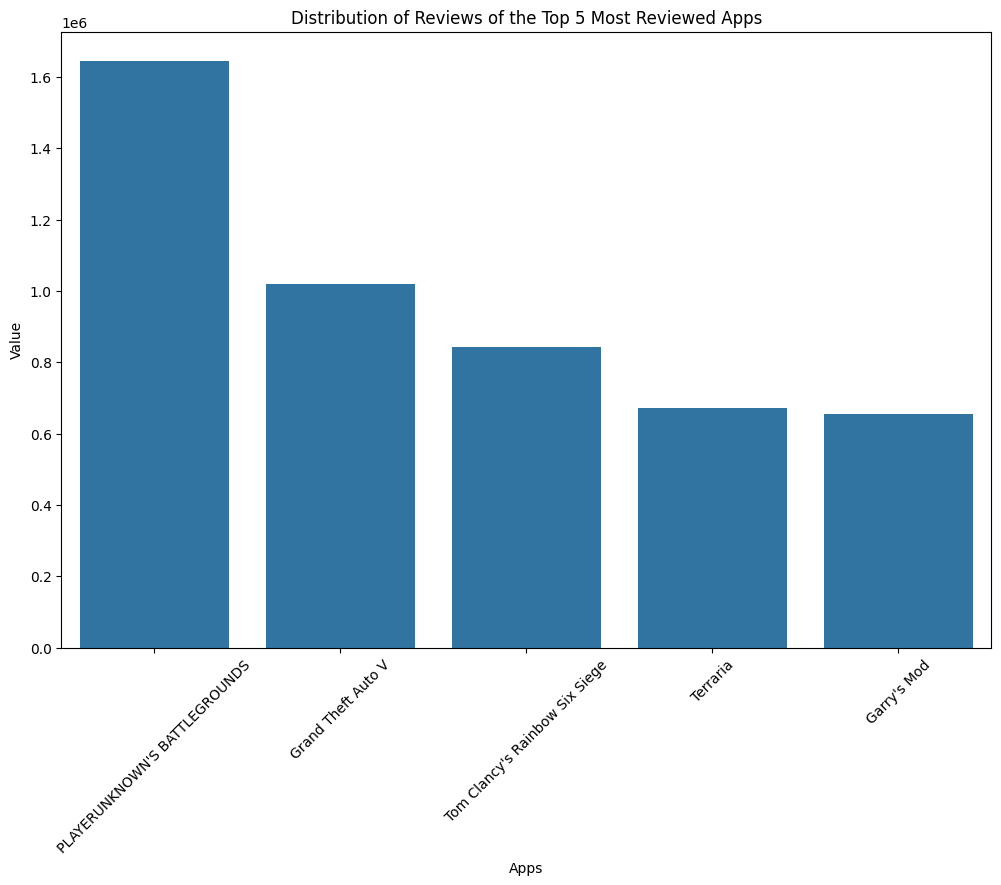

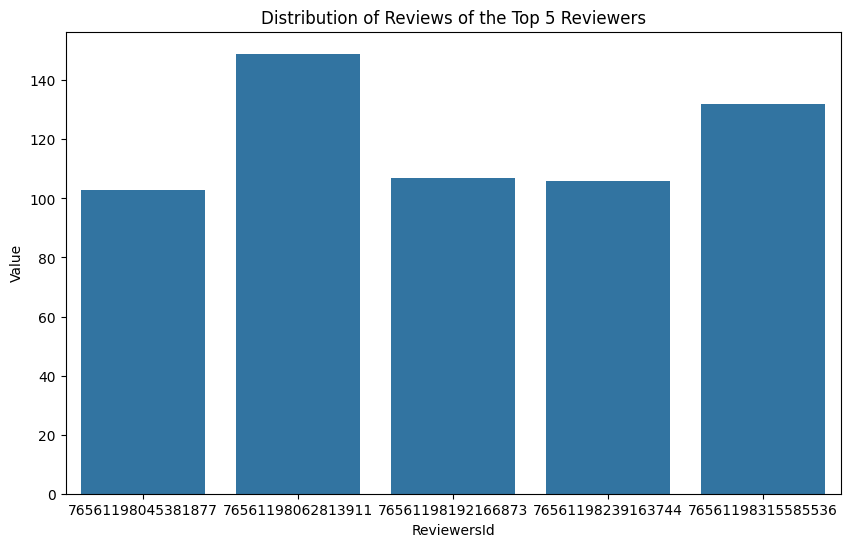

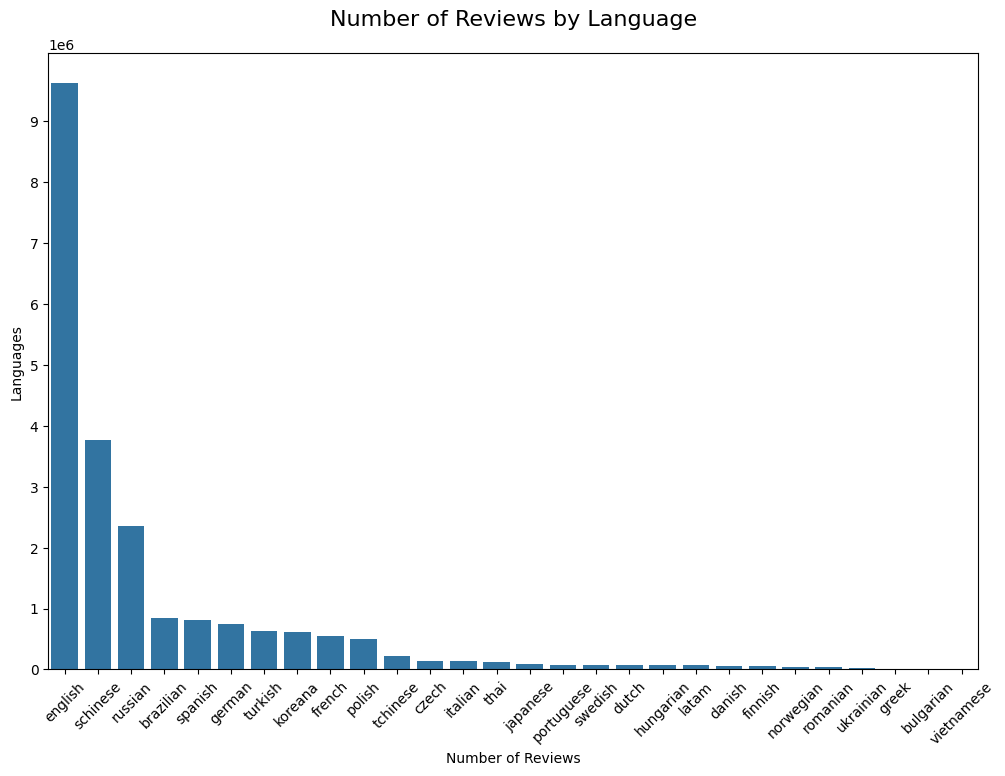

In [ ]:
functions.visualize(df)

### **[RQ2] - Analysis of the Distribution of reviews**

1. Identify which applications have the highest and lowest number of reviews

In [ ]:

functions.highest_lowest_reviews_applications(df)


Top apps with the most reviews:
                                 count_reviews
app_name                                    
PLAYERUNKNOWN'S BATTLEGROUNDS        1644255

Top apps with the minimum reviews:
                  count_reviews
app_name                     
Neon Hardcorps            200



2. Plot the number of reviews for each application in descending order. What insights can you draw from the plot?


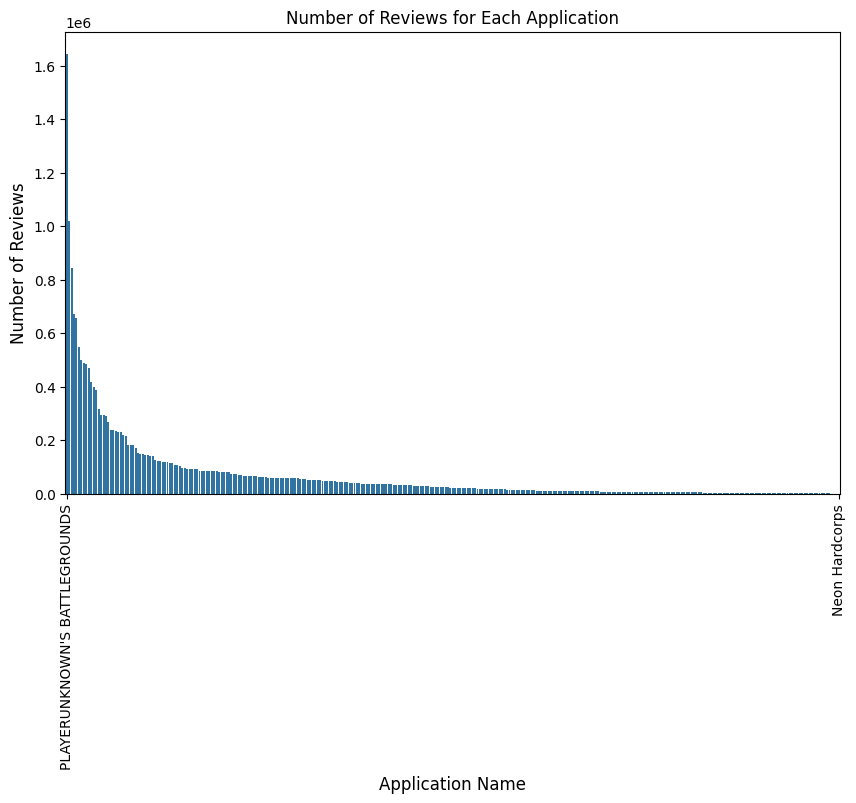

In [ ]:
functions.reviews_count_plot(df)

3. For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.


In [ ]:
functions.puchased_gratis_reviewers(df)

Percentage of Reviewers that purchased the app for the Top 5 Most Reviewed Apps:
                                 percentage_of_purchase_reviewers
app_name                                                        
Garry's Mod                                                84.09
Grand Theft Auto V                                         88.83
PLAYERUNKNOWN'S BATTLEGROUNDS                              83.49
Terraria                                                   78.44
Tom Clancy's Rainbow Six Siege                             83.44
Percentage of Reviewers that received for free the app for the Top 5 Most Reviewed Apps:
                                 percentage_of_free_reviewers
app_name                                                    
Garry's Mod                                             3.78
Grand Theft Auto V                                      3.79
PLAYERUNKNOWN'S BATTLEGROUNDS                           3.74
Terraria                                                3.00
Tom Cla

4. Which applications have the most and the least user recommendations? Summarize your findings.


In [ ]:
functions.most_least_recommended_reviews_applications(df)

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS    886417
Name: recommended, dtype: int64
Most recommended apps:
                                 count_of_recommended_reviews
app_name                                                   
PLAYERUNKNOWN'S BATTLEGROUNDS                        886417

Least Recommended apps:
                  count_of_recommended_reviews
app_name                                    
Neon Hardcorps                            89



5. Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.


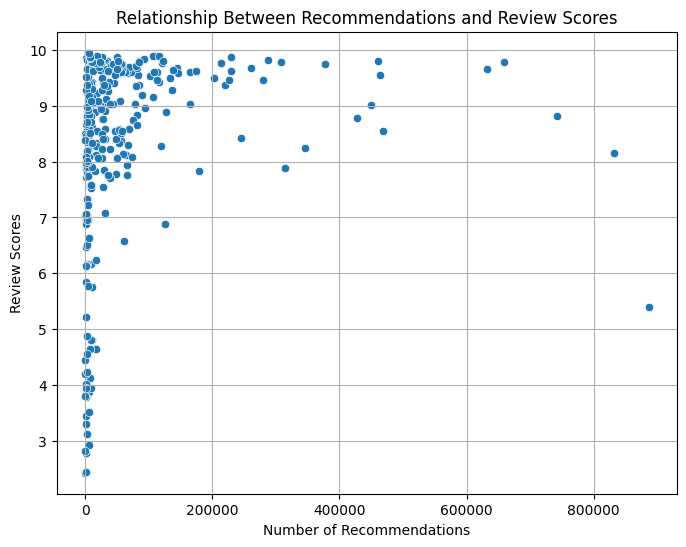

Pearson correlation coefficient: 0.15, p-value: 0.0062
There is a statistically significant linear correlation (Pearson).


In [ ]:
functions.statistical_correlation(df)

### **[RQ7] - Probability and Statistical Tests**

1. What is the probability of submitting a review and receiving at least one helpful vote from other users?


Through the **complement rule** we know that the probability of an event is equal to \( 1 - the probability of its complementary event\)

Formally:

If \($A$\) is an event, then the probability of \($A$\), denoted P(A), is given by:

$P(A) = 1 - P(A^c)$


where \($A^c$\) represents the complement of \($A$\) (i.e., the event that occurs when \($A$\) does not occur).

### **Explanation**
- In this case, the probability of receiving at least one helpful votes from other users for each review is equal to 1 - the probability of receiving zero helpful votes from other users for each review.
- The probability of receiving zero helpful votes from other users for each review by the definition of probability is the number of the reviews with zero votes divided by the number of total reviews. 


In [35]:
1 - functions.probability_one_helpful_vote(df)

0.23520355360389988

2. What is the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app?

Given $A$ the event representing the probability of receiving at least one helpful vote from other users,  the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app (event $R$) is equal to:
$$ P(A|R) = \frac{P(A ∩ R)}{P(R)}$$
The Two Probabilities can be computed again through the definition of probability of an event A:
$$ P(A) = \frac{| number\,of\, favourable\,  outcomes\,  | }{| Total\,  number\,  of\,  outcomes\,  |} $$
But this time, for the denominator and numerator, we can check that the Total number of outcomes is the same because its the number of total reviews, so we can equate the first equation to the following:
$$ P(A | R) = \frac{| number\,  of\,  rows\,  where\,  both\,  the\,  event\,  A\,  and\,  R\,  occur\,  | }{|  number\,  of\,  rows\,  where\,  the\,  event\,  R\,  occurs\,   |} $$


In [37]:
functions.conditional_probability_recommended(df)

0.42326108414956315

3. Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it.


To check the independence of two events A and B in probability we can use the **Property of Independence**:
$$ P(A ∩ B) = P(A)*P(B) $$
* But In real-world data, the assumption of perfect independence often doesn’t hold due to noise, sampling errors, or complex underlying patterns. <br>
Directly checking $P(A ∩ B) = P(A) * P(B)$ might lead to misleading conclusions, especially in large datasets where slight discrepancies from exact equality are common.

For this reason, we prefer using the **Chi-Square test** that  is very common for testing the independence between two categorical variables using a contingency table analysis.

In [49]:
functions.check_probability_independence(df)

Chi-Square Test: Chi2=57016.11760344674, p-value=0.0
The two events are NOT independent (significant at 95%)


4. We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.


The hypothesis suggests an **inverse relationship** between the number of games owned and the number of reviews submitted. This means we expect that as the number of games owned increases, the number of reviews submitted decreases.
So we'll focus our analysis on the relationship between this two columns:
* ```author.num_games_owned```
* ```author.num_reviews```

To achieve that, we compute the **Person coefficient**.
The Pearson correlation coefficient measures the strength and direction of the linear relationship between two continuous variables. 
* ```Coefficient Interpretation```:
    * $r=1$: Indicates a perfect positive linear relationship. If one variable increases, the other increases proportionally.
    * $r=−1$: Indicates a perfect negative linear relationship. If one variable increases, the other decreases proportionally.
    * $r=0$: Indicates no linear relationship. There is no linear correlation between the two variables.

The p-value indicates the statistical significance of the correlation.     
* ```P-value```:    
    * *P-value* $< 0.05$: Indicates a statistically significant correlation. In this case, we can reject the null hypothesis and conclude that there is a correlation between the variables.
    * $0.05 ≤$ *P-value* $< 0.10$: Indicates a marginally significant correlation.
    * *P-value* $ ≥ 0.10$: Indicates that there is not enough evidence to reject the null hypothesis. We cannot conclude that there is a significant correlation.

In [52]:
functions.check_correlation(df)

       author.num_games_owned  author.num_reviews
count            1.240656e+07        1.240656e+07
mean             1.418063e+06        7.089912e+05
std              2.497262e+09        1.765831e+09
min              0.000000e+00        1.000000e+00
25%              1.300000e+01        1.000000e+00
50%              3.800000e+01        2.000000e+00
75%              9.600000e+01        4.000000e+00
max              4.398047e+12        4.398047e+12
Pearson correlation coefficient: -2.2798371763833485e-07 p-value: 0.9993592782120561


We can see from the output of the function that the relationship between the two columns is very weak, underlined by the distance of the **p-value** ≈ 0.99 and **Pearson coefficient** ≈ 0.

5. Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?

This was the question i asked to ChatGPT:
* *"Understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis"*

This was what the LLM has responded to me:

##### **1. Histograms** 
**Purpose**:
* A histogram is used to visualize the distribution of a dataset by showing the frequency of data points within specified ranges (bins).

**Insights Offered**:

* **Distribution Shape**: Shows whether the data is normally distributed, skewed, or has outliers.
* **Central Tendency**: Provides a visual indication of the mean, median, and mode.
* **Spread**: Helps in understanding the variability in the data, showing where most data points lie and the range of values.
* **Frequency**: Indicates how many observations fall into each range, helping to identify peaks and gaps in the data.

**Use Cases**:
* Analyzing the distribution of test scores, age distribution in a population, or income levels.

##### **2. Bar Plots**
**Purpose**:
* A bar plot (or bar chart) is used to compare different groups or categories by representing their values with bars of different lengths.

**Insights Offered**:
* **Comparison Across Categories**: Easily compares the size of different categories, showing which is larger or smaller.
* **Trends Over Time**: If using a time-based categorical variable, bar plots can illustrate how values change over time.
* **Relative Size**: Helps in understanding the proportional differences among groups.

**Use Cases**:
* Comparing sales across different products, customer satisfaction scores by service type, or survey responses by demographic groups.

##### **3. Scatterplots**
**Purpose**:

* A scatterplot displays values for two different variables on a two-dimensional graph, allowing for the examination of relationships and correlations between them.
**Insights Offered:**

* **Correlation:** Shows the strength and direction of a relationship between two variables (positive, negative, or none).
* **Outliers:** Helps identify any unusual data points that deviate significantly from the trend.
* **Clustering:** Indicates if data points naturally group into clusters, which can suggest the presence of subgroups within the data.
**Use Cases:**

* Analyzing the relationship between hours studied and exam scores, or income versus spending on luxury goods.

##### **4. Pie Charts**
**Purpose:**

* A pie chart is used to show the proportions of a whole, displaying categorical data in slices.

**Insights Offered:**

* **Composition:** Illustrates the parts of a whole, helping to visualize how individual categories contribute to the total.
* **Proportional Relationships:** Useful for showing relative sizes among categories, especially when there are only a few categories.

**Use Cases:**

* Showing market share of companies, demographic breakdown of a population, or budget distribution across departments.  



| Chart Type   | Best For                           | Insights Offered                                   |
|--------------|------------------------------------|---------------------------------------------------|
| Histograms   | Distribution of continuous data    | Distribution shape, central tendency, variability  |
| Bar Plots    | Comparing categorical data         | Size comparison, trends, relative sizes           |
| Scatterplots | Relationships between two variables | Correlation, outliers, clustering                  |
| Pie Charts   | Proportional representation        | Composition, proportional relationships            |




I agree with the results given by the LLM, in this exercise we can see from the table that the plot that would suit the most would be the Scatter Plot to underline the correlation between the columns *author.num_games_owned* and *author.num_reviews*.


### **Bonus**

1. Perform sentiment analysis on the review texts in the top 3 languages and classify them as positive, negative, or neutral.

In [17]:
df_sentiment_analysis = functions.sentiment_classification(df)
df_sentiment_analysis.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,sentiment
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,...,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09,positive
5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,...,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09,positive
6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,0,...,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09,neutral
18,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,...,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09,positive
20,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,...,False,False,76561198996835044,131,2,8557.0,2004.0,8557.0,1.611371e+09,neutral


2. What is the distribution of sentiment across all reviews?


In [18]:
functions.compute_distribution(df_sentiment_analysis)

Sentiment Distribution (in %):
sentiment
positive    69.741336
neutral     15.385620
negative    14.873044
Name: proportion, dtype: float64


3. Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison.


In [19]:
functions.comparison_sentiment_recommendations(df_sentiment_analysis)

Sentiment Distribution by Recommendation:
sentiment    negative  neutral  positive
recommended                             
False          533073   138229    379258
True           897518  1341665   6328940

Sentiment Percentage by Recommendation:
sentiment     negative    neutral   positive
recommended                                 
False        50.741795  13.157649  36.100556
True         10.475083  15.658797  73.866120


4. Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.


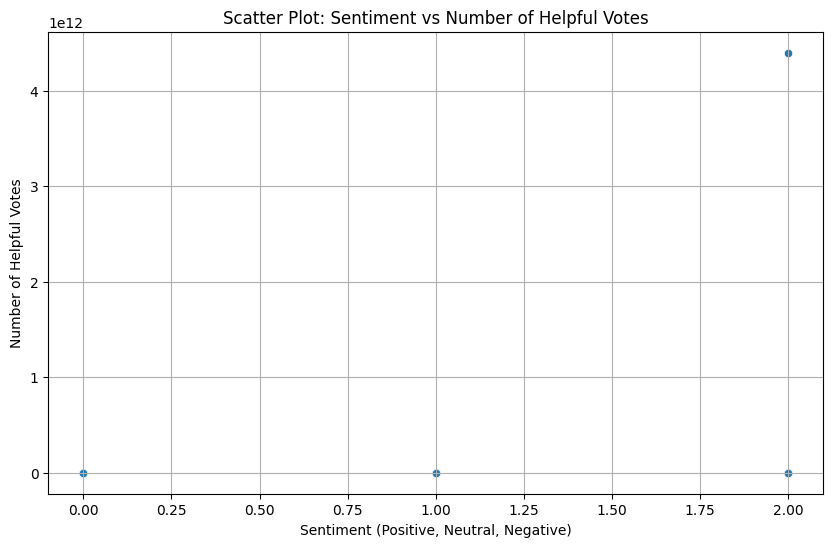

In [20]:
functions.correlation_sentiment_helpful_votes(df_sentiment_analysis)

### **Algorithmic Question (AQ)**

In [21]:
#TO DO
functions.algorithmic_question()

TypeError: algorithmic_question() missing 2 required positional arguments: 'n' and 'k'